In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')

In [3]:
def ratings_data(text):   
    rate =  re.search(r'(\d+(\.\d+)?)/10',text)
    if rate:
        rate_match = rate.group(0)
        rate_split = rate_match.split('/')[0]
        rate = float(rate_split)
    return(rate)

data['ratings'] = data['text'].apply(ratings_data)

#reference from https://pythonguides.com/pandas-drop/#:~:text=The%20Pandas%20drop%20%28%29%20function%20in%20Python%20is,levels%20can%20be%20removed%20by%20specifying%20the%20level.
new_data = data.dropna(subset=['ratings'])
revised_data = new_data.drop(data[data['ratings'] > 25].index)
data = revised_data

In [4]:
#reference from https://datatofish.com/strings-to-datetime-pandas/#:~:text=1%20Collect%20the%20Data%20to%20be%20Converted%20To,Convert%20the%20Strings%20to%20Datetime%20in%20the%20DataFrame
data.created_at = pd.to_datetime(data['created_at'], format='%Y-%m-%d %H:%M:%S')

In [5]:
def to_timestamp(date_time):
    d_t = date_time.timestamp()
    return d_t

data['timestamp'] = data['created_at'].apply(to_timestamp)

# Results

In [6]:
fit = stats.linregress(data['timestamp'], data['ratings'])
data['prediction'] = data['timestamp']*fit.slope + fit.intercept
data

,id,created_at,text,ratings,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.624973
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.622373
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.620951
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.613109
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.610619
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09,13.183014
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09,13.180420
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09,13.168949
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09,13.168949


In [7]:
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.445058882763483)

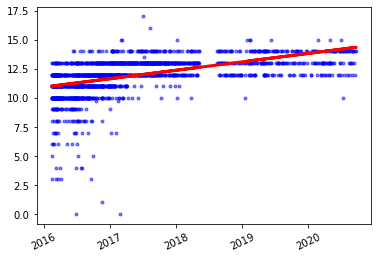

In [8]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['ratings'] , 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

In [9]:
fit.pvalue

3.793798773108244e-121

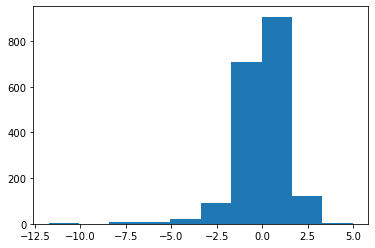

In [10]:
residuals = data['ratings'] - data['prediction']
plt.hist(residuals);